In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import nltk
import re
import string
import csv
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
def sentiment_analysis(text, positive_words, negative_words):
    
    tokens = nltk.word_tokenize(text) 

    with open("positive-words.txt",'r') as f:
        positive_words=[line.strip() for line in f]


    positive_tokens=[token for token in tokens \
                 if token in positive_words]

    #print(positive_tokens)

    with open("negative-words.txt",'r') as f:
        negative_words=[line.strip() for line in f]


    negative_tokens=[token for token in tokens \
                 if token in negative_words]

    #print(negative_tokens)



    negations=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor']
      




    for idx, token in enumerate(tokens):
        if token in positive_words:
            if idx>0:
                if tokens[idx-1] not in negations:
                    positive_tokens.append(token)
                else:
                    negative_tokens.append(token)
            else:
                positive_tokens.append(token)


    #print(positive_tokens)



    for idx, token in enumerate(tokens):
        if token in negative_words:
            if idx>0:
                if tokens[idx-1] not in negations:
                    negative_tokens.append(token)
                else:
                    positive_tokens.append(token)
            else:
                negative_tokens.append(token)


    #print(negative_tokens)

    pos={key:tokens.count(key) for key in positive_tokens}
    neg={key:tokens.count(key) for key in negative_tokens}
    pos
    neg
    pos_sum= sum(pos.values())
    #print("Positive Word Sum=",pos_sum)
    neg_sum=sum(neg.values())
    #print("Negative Word Sum=",neg_sum)

    Sentiment = 0
    if pos_sum>neg_sum:
        Sentiment = 2
    else:
        Sentiment = 1

    #print(Sentiment)
    return Sentiment

with open("positive-words.txt",'r') as f:
        positive_words=[line.strip() for line in f]

with open("negative-words.txt",'r') as f:
        negative_words=[line.strip() for line in f]
#sentiment_analysis(text, positive_words, negative_words);

import csv


In [ ]:

def performance_evaluate(input_file):
    
    result=[]

    with open(input_file, "r",encoding="Latin1") as f:
        reader=csv.reader(f, delimiter=',') 
        rows=[(row[1][0],row[1][1]) \
              for row in enumerate(reader)]       
    len(rows)
    y= [row[1] for row in rows]
    len(y)
    rows
    for i in range(len(rows)):
        sen_result = (sentiment_analysis(y[i], positive_words, negative_words));
        #print(sen_result)
        result.append(sen_result)
    #print(result)
    return result

In [7]:
def collate_data(file_news):

    l=[]


    file_open = "news_"+file_news+".csv"
    #file_open = "C:/Users/shrey/OneDrive/Desktop/seaktop/660 Web/Project/news_"+file+".csv"
    #print(file)


    with open (file_open, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            l.append(row)
        


    df_news = pd.DataFrame(l , columns = l[0])
    #df_news.drop(df_news.index[0], inplace = True)
    df_news['Company'] = file_news
    df_news['Sentiment']= performance_evaluate("news_"+file_news+".csv")
    return (df_news)

In [8]:
def collate_stock_data(files):

  
    stock=[]

    file_open = ""+files+"_stock.csv"
    #file_open = "C:/Users/shrey/OneDrive/Desktop/seaktop/660 Web/Project/news_"+file+".csv"
    #print(file)


    with open (file_open, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            stock.append(row)



    df_stock = pd.DataFrame(stock , columns = stock[0])
    df_stock.drop(df_stock.index[0], inplace = True)
    df_stock['Company'] = files
    #print(df_stock)
    return (df_stock)

Text(0.5,1,'Microsoft Open and Close')

Text(0.5,0,'Date')

Text(0,0.5,'Stock_Price')

Text(0.5,1,'Netflix Open and Close')

Text(0.5,0,'Date')

Text(0,0.5,'Stock_Price')

Text(0.5,1,'amazon Open and Close')

Text(0.5,0,'Date')

Text(0,0.5,'Stock_Price')

Text(0.5,1,'Boeing Open and Close')

Text(0.5,0,'Date')

Text(0,0.5,'Stock_Price')

Text(0.5,1,'Google Open and Close')

Text(0.5,0,'Date')

Text(0,0.5,'Stock_Price')

Text(0.5,1,'Facebook Open and Close')

Text(0.5,0,'Date')

Text(0,0.5,'Stock_Price')

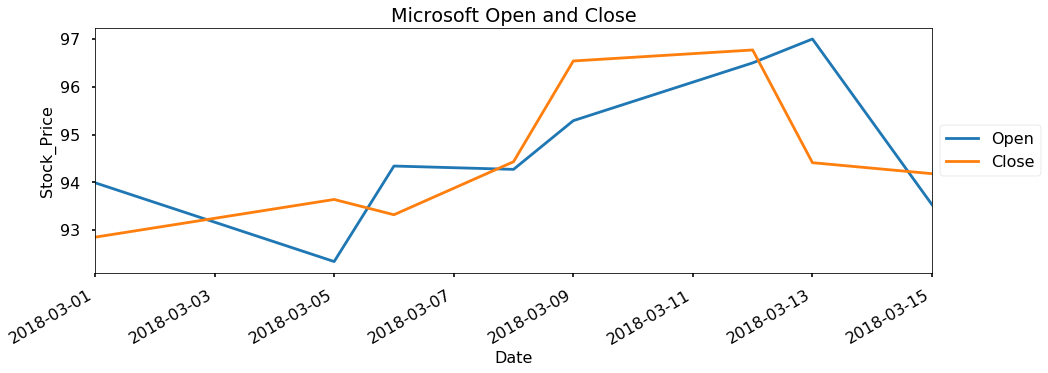

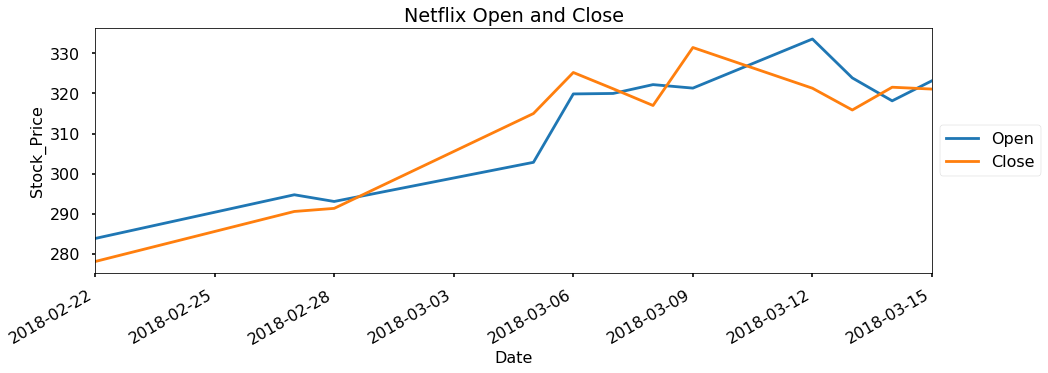

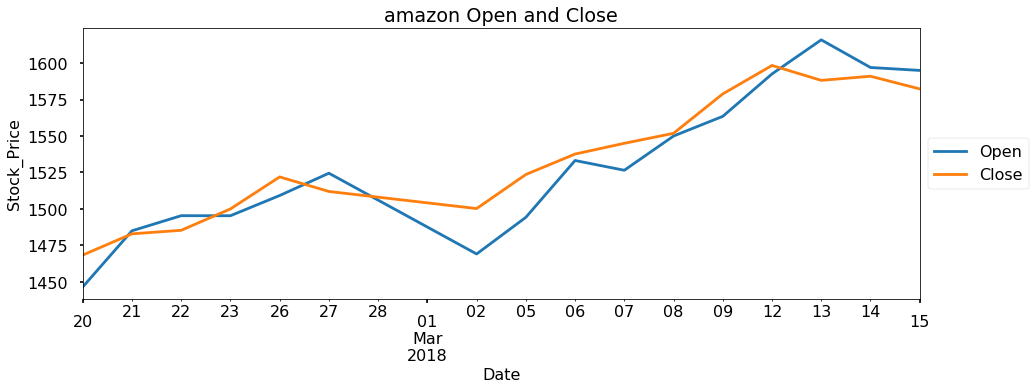

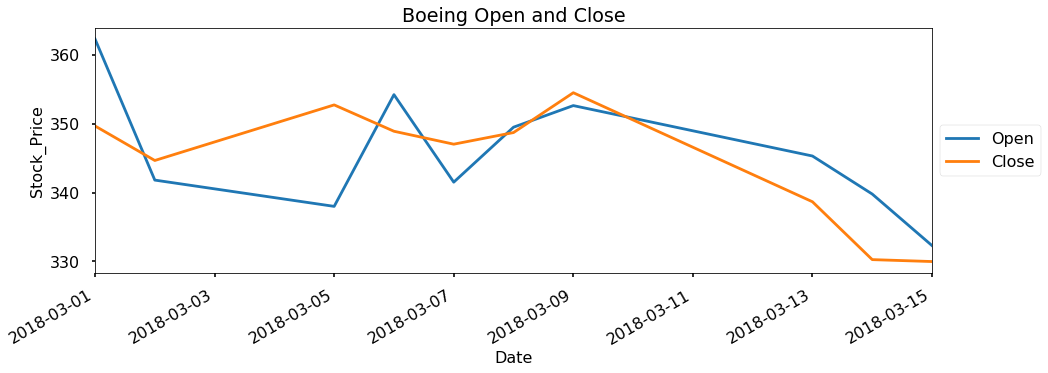

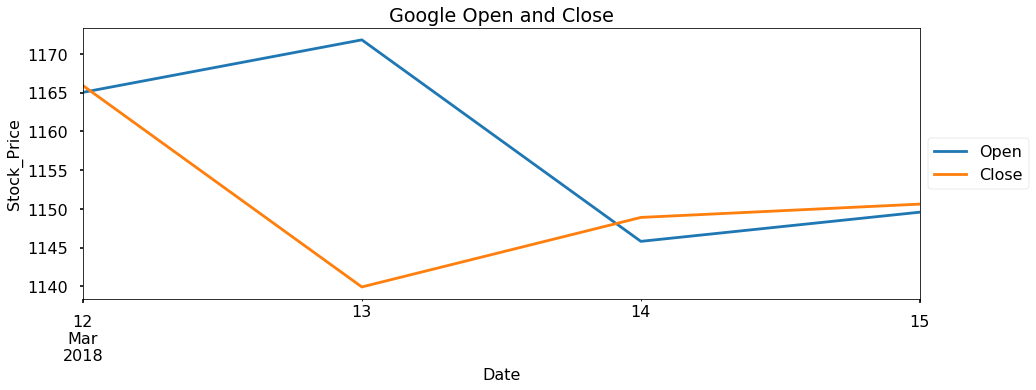

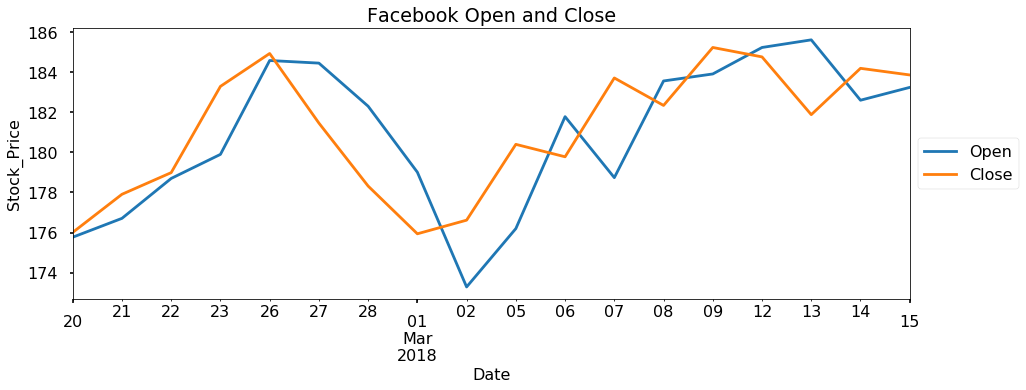

In [103]:
if __name__ == "__main__":  
    d = {}
    files = ['Facebook','BOA','Microsoft','Netflix','yahoo','boeing','amazon','google']
    
    #https://stackoverflow.com/questions/30635145/create-multiple-dataframes-in-loop
    for i in files:
        d[i] =  pd.DataFrame(data = collate_data(i), columns = ['Date','News','Company','Sentiment'])
    
    #https://pandas.pydata.org/pandas-docs/stable/merging.html
    news_data_final = pd.concat([d['Facebook'],d['BOA'],d['Microsoft'],d['Netflix'],d['yahoo'],d['boeing'],d['amazon'],d['google']],ignore_index=True)

    
    #Getting consolidated Stock Data
        
    file_stock = ['JPM','FB','BAC','GOOGL','BA','AMZN','AAPL','NFLX','AABA','MSFT']
    stock_quotes_data={}

    for i in file_stock:
            stock_quotes_data[i] =  pd.DataFrame(data = collate_stock_data(i), columns = ['Date','Open','High','Low','Close','Volume','Company'])

    stock_data_final = pd.concat([stock_quotes_data['MSFT'],stock_quotes_data['AABA'],\
                        stock_quotes_data['NFLX'],stock_quotes_data['AAPL'],\
                        stock_quotes_data['AMZN'],stock_quotes_data['BA'],\
                        stock_quotes_data['GOOGL'],stock_quotes_data['BAC'],\
                        stock_quotes_data['FB'],stock_quotes_data['JPM']],ignore_index=True)

    list_to_replace = ['MSFT','AABA','NFLX','AAPL','AMZN','BA','GOOGL','BAC','FB','JPM']
    list_to_use = ['Microsoft','Yahoo','Netflix','Aaple','amazon','Boeing','Google','BOA','Facebook','JP Morgan']
    
    #https://chrisalbon.com/python/data_wrangling/pandas_replace_values/
    #replace values to join
    for val in range(len(list_to_use)):
        stock_data_final.replace(list_to_replace[val],list_to_use[val], inplace=True)
    
    
    #standardizing the data to merge
    stock_data_final['Company'] = stock_data_final['Company'].str.lower()
    #df.stock_data_final['Date'] = pd.to_datetime(df.stock_data_final['Date'])
    news_data_final['Company'] = news_data_final['Company'].str.lower()
    #df.news_data_final['Date'] = pd.to_datetime(df.news_data_final['Date'])
    
    
   #merging data to get final Output
    final_dataset = pd.merge(news_data_final,stock_data_final, how = 'inner', on = ['Date','Company'])
    final_dataset.to_csv('final_data.csv')
    
    #creating csv to get output
    
    stock_data_final.to_csv('stock_final_data.csv')
    news_data_final.to_csv('news_data_final.csv')
    


    final_dataset['Date'] =  pd.to_datetime(final_dataset['Date'])

    headers = final_dataset.columns.tolist()
    list_to_use1 = ['Microsoft','Netflix','amazon','Boeing','Google','Facebook']
    #converting str to numnerics
    for header in headers[4:]:
        final_dataset[header] =  pd.to_numeric(final_dataset[header])

    for company in list_to_use1:
        data_for_plotting = final_dataset[final_dataset['Company'] == company.lower()]

        data_for_plotting.groupby('Date')['Open','Close'].mean().plot(kind='line', figsize=(15,5)).\
        legend(loc='center left', bbox_to_anchor=(1, 0.5));  # set legend
        plt.title(company +' Open and Close')
        plt.xlabel('Date', fontsize=16)
        plt.ylabel('Stock_Price', fontsize=16)
    

Text(0.5,1,'Microsoft Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiment')

Text(0.5,1,'Netflix Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiment')

Text(0.5,1,'amazon Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiment')

Text(0.5,1,'Boeing Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiment')

Text(0.5,1,'Google Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiment')

Text(0.5,1,'Facebook Sentiment')

Text(0.5,0,'Date')

Text(0,0.5,'Sentiment')

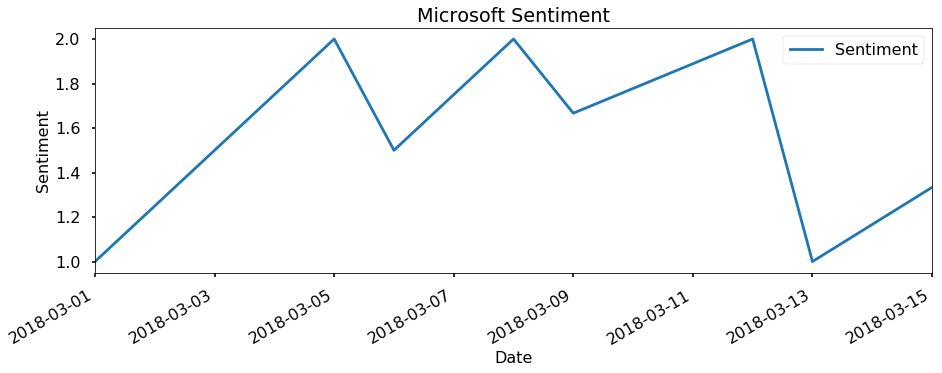

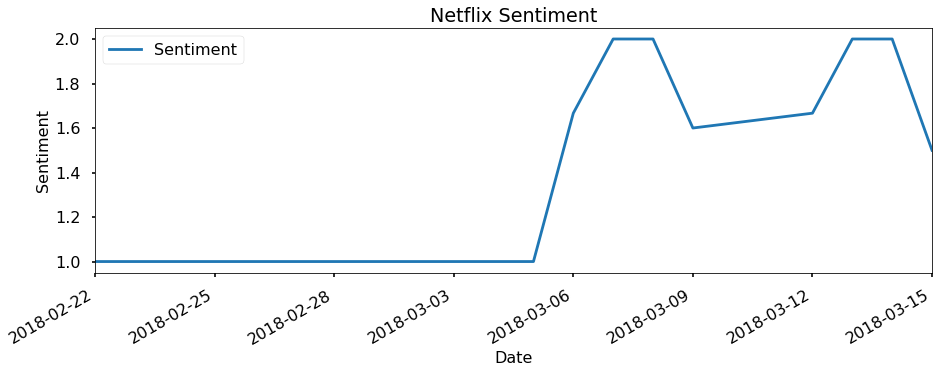

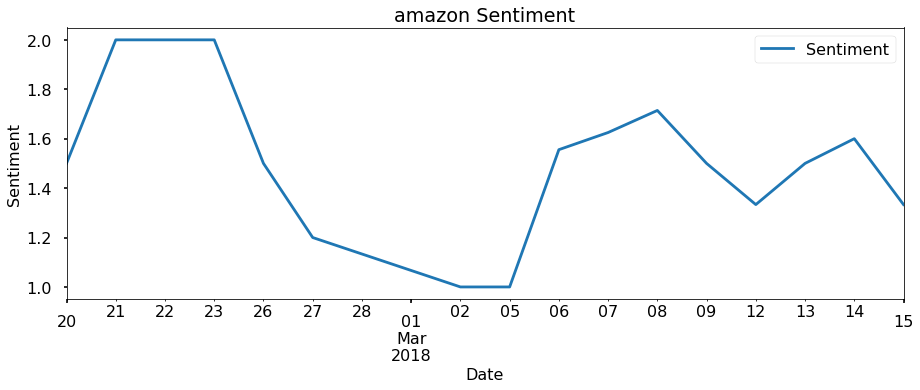

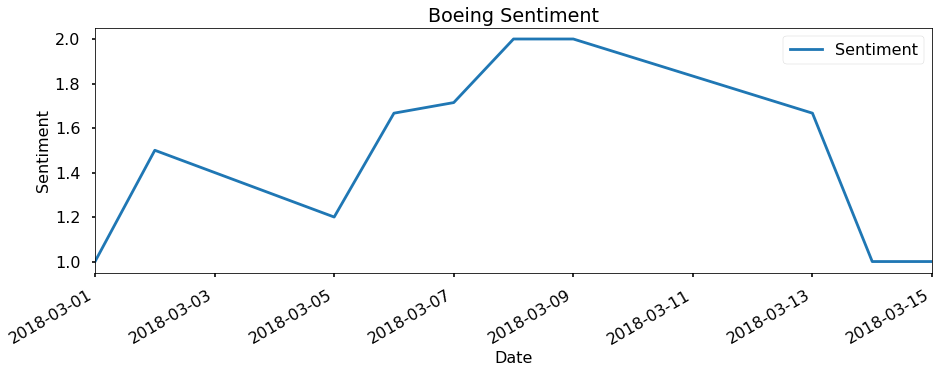

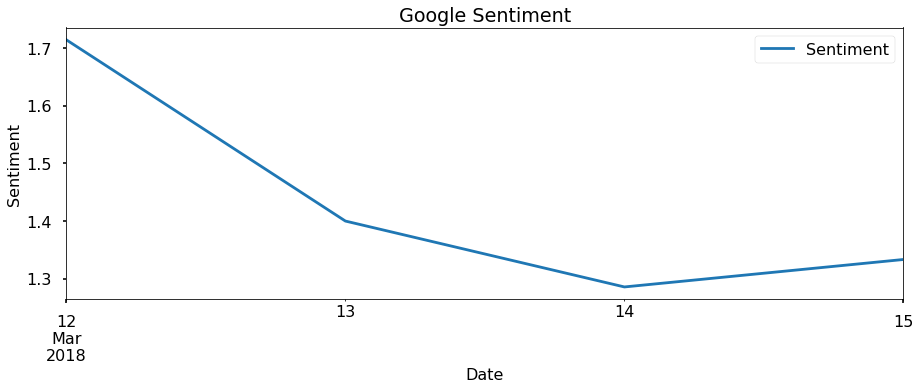

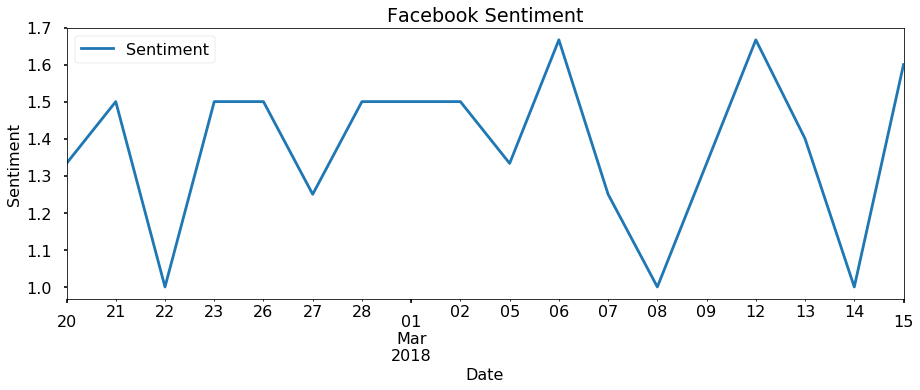

In [113]:
list_to_use1 = ['Microsoft','Netflix','amazon','Boeing','Google','Facebook']


for company in list_to_use1:
        data_for_plotting = final_dataset[final_dataset['Company'] == company.lower()]
        data_for_plotting.groupby('Date')[['Sentiment']].mean().plot(kind='line', figsize=(15,5))
        plt.title(company +' Sentiment')
        plt.xlabel('Date', fontsize=16)
        plt.ylabel('Sentiment', fontsize=16)
